In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


In [4]:
def map_smoking(column):
    mapped = []
    for value in column:
        if value == 'yes':
            mapped.append(1)
        else:
            mapped.append(0)
        
    return mapped

In [5]:
new_col = map_smoking(df['smoker'])

In [9]:
df['smoker_norm'] = new_col

In [11]:
def map_obese(column):
    mapped = []
    for value in column:
        if value > 30:
            mapped.append(1)
        else:
            mapped.append(0)
        
    return mapped

df['obese'] = map_obese(df['bmi'])

In [13]:
def map_sex(column):
    mapped = []
    for value in column:
        if value == 'male':
            mapped.append(1)
        else:
            mapped.append(0)
        
    return mapped

df['sex_norm'] = map_sex(df['sex'])

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


In [15]:
df.shape

(1338, 10)

In [16]:
df.describe()

,age,bmi,children,charges,smoker_norm,obese,sex_norm
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.526906,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.499462,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000


In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_norm', 'obese', 'sex_norm'],
      dtype='object')

/Users/sudeng/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


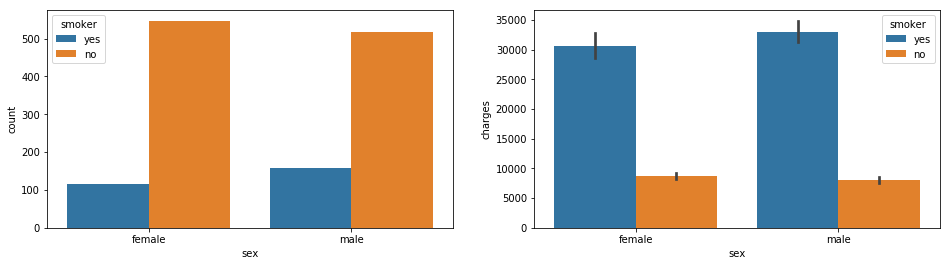

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4));
sns.countplot(x='sex', data=df, hue='smoker', ax=axes[0]);
sns.barplot(x='sex', y='charges', data=df, hue='smoker', ax=axes[1]);

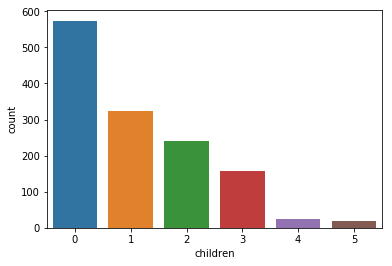

In [25]:
sns.countplot(x='children', data=df);

/Users/sudeng/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


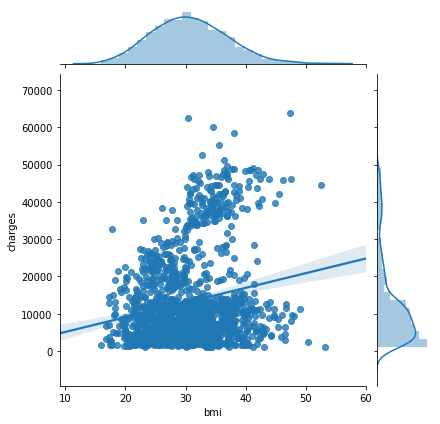

In [26]:
sns.jointplot(x='bmi', y='charges', data=df, kind='reg');

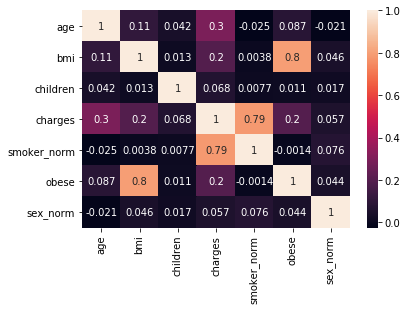

In [28]:
sns.heatmap(df.corr(), annot=True)

In [29]:
x = df[['age', 'bmi', 'children', 'smoker_norm', 'obese']]
y = df['charges']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [36]:
x_train.head()

,age,bmi,children,smoker_norm,obese
612,18,33.155,0,0,1
65,19,28.900,0,0,0
42,41,21.780,1,0,0
533,37,36.190,0,0,1
586,21,20.235,3,0,0


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [35]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
lr.intercept_

-6569.1175230230965

In [38]:
lr.coef_

array([  241.39461251,    90.26053022,   537.54489467, 23418.33376791,
        4166.66138097])

In [39]:
pd.DataFrame(lr.coef_, x.columns, columns=['coefficient'])

,coefficient
age,241.394613
bmi,90.260530
children,537.544895
smoker_norm,23418.333768
obese,4166.661381


In [40]:
pred = lr.predict(x_test)

Text(0,0.5,'predictions')

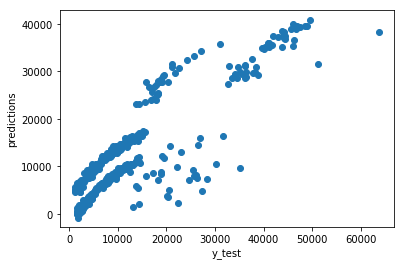

In [42]:
plt.scatter(y_test, pred);
plt.xlabel('y_test')
plt.ylabel('predictions')

/Users/sudeng/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


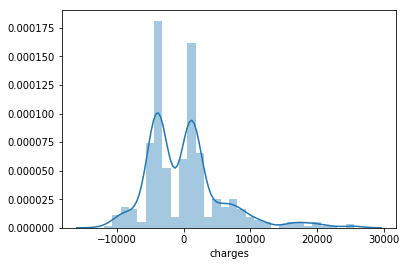

In [44]:
sns.distplot(y_test - pred, bins=30)

In [46]:
from sklearn import metrics

In [49]:
print('MAE', metrics.mean_absolute_error(y_test, pred))
print('MSE', metrics.mean_squared_error(y_test, pred))
print('RMSE', metrics.mean_squared_error(y_test, pred)**0.5)

MAE 4244.4865180564075
MSE 33540220.023688883
RMSE 5791.391890011319
